In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Train.csv")
df_test=pd.read_csv("/content/drive/MyDrive/Test.csv")

In [5]:
#It shows that we have imbalance in our dataset
df["Rating"].value_counts()

,count
Rating,
3,30503
1,16147
2,1350


### Simple Pre Processing

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters & numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # lemmatizer (get the root of the word)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back to a string
    return ' '.join(tokens)


In [8]:
#applying the function to our dataset
df["clean reviews"] = df["Review"].apply(preprocess_text)
df["clean reviews"]

,clean reviews
0,order quickly dispatched product excellent qua...
1,ive set phone knocked price quoted id like kno...
2,great price next day delivery simple use item ...
3,first time buying site say start finish smooth...
4,worst phone provider ever got phone contract p...
...,...
47995,absolute utter incompetence weve finally enabl...
47996,poorly trimmed photo uneven border resent orde...
47997,day delivery hisense fridge notified delivery ...
47998,great service wide range spare good price prom...


In [9]:
df_test["clean reviews"] = df_test["Review"].apply(preprocess_text)
df_test["clean reviews"]

,clean reviews
0,great service easy find needed order superfast...
1,quick process product arrived good condition
2,kettle look great time using started leaking a...
3,easy order quick dispatchexcellent service
4,could use debit card payment kept telling paym...
...,...
11995,excellent service excellent phone
11996,really great friendly professional staff always
11997,got needed exactly
11998,initially helpful month service keep dropping ...


In [10]:
from collections import Counter

# Tokenize words from all reviews
all_words = " ".join(df["clean reviews"]).split()
word_freq = Counter(all_words)

# Show the 20 most common words
print(word_freq.most_common(20))


[('service', 22058), ('delivery', 13976), ('phone', 13798), ('day', 13527), ('time', 13041), ('customer', 12095), ('would', 11366), ('good', 9788), ('order', 8733), ('get', 8594), ('great', 8156), ('company', 8145), ('one', 6840), ('call', 6696), ('told', 6581), ('back', 6264), ('use', 6161), ('new', 6087), ('still', 5971), ('price', 5943)]


In [11]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [12]:
pip install Afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=dbb561416f20e6ffbb9182f7a09bbc85928b314535f184807cc0327c558aed31
  Stored in directory: /root/.cache/pip/wheels/ee/d3/a0/f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built Afinn


In [13]:
#VADER is a tool that provides a sentiment analysis by returning polarity scores
# (positive, negative, neutral) along with a compound score for a given text
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#train
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = [analyzer.polarity_scores(doc) for doc in df["clean reviews"]]
sentiment_df = pd.DataFrame(sentiment_scores)
df["sentiment_scores"]=sentiment_df["compound"]

In [14]:
#test
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = [analyzer.polarity_scores(doc) for doc in df_test["clean reviews"]]
sentiment_dft = pd.DataFrame(sentiment_scores)

In [15]:
#Apply TextBlob Sentiment Analysis
#train
from textblob import TextBlob

df["textblob_polarity"] = df["clean reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)
textblob_df = df[["textblob_polarity"]]

In [16]:
#test
df_test["textblob_polarity"] = df_test["clean reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)
textblob_dft = df_test[["textblob_polarity"]]

In [17]:
#train
from afinn import Afinn
afinn = Afinn()
df["afinn_score"] = df["clean reviews"].apply(lambda x: afinn.score(x))
df_test["afinn_score"] = df_test["clean reviews"].apply(lambda x: afinn.score(x))

In [18]:
#getting the word count and char count beacause it helps in identifying reviews
df["word_count"] = df["clean reviews"].apply(lambda x: len(x.split()))
df["char_count"] = df["clean reviews"].apply(lambda x: len(x))

df_test["word_count"] = df_test["clean reviews"].apply(lambda x: len(x.split()))
df_test["char_count"] = df_test["clean reviews"].apply(lambda x: len(x))

In [19]:
# Compute correlations between sentiment scores and rating
correlation_matrix = df[["textblob_polarity",
                         "afinn_score","word_count","char_count",
                         "sentiment_scores",'Rating']].corr()["Rating"]
print(correlation_matrix)


textblob_polarity    0.650847
afinn_score          0.510075
word_count          -0.472339
char_count          -0.464887
sentiment_scores     0.654366
Rating               1.000000
Name: Rating, dtype: float64


### Tf idf

In [20]:
#used Tf Idf to convert text into numerical format
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3),stop_words='english',min_df=2,max_df=0.9,sublinear_tf=True)
X_tfidf = vectorizer.fit_transform(df["clean reviews"])

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3),stop_words='english',min_df=2,max_df=0.9,sublinear_tf=True)
X_tfidft = vectorizer.fit_transform(df_test["clean reviews"])

In [22]:
from sklearn.decomposition import TruncatedSVD

# Apply Truncated SVD to make the dimension less and make training faster
svd = TruncatedSVD(n_components=1000)
X_reduced = svd.fit_transform(X_tfidf)

print(X_reduced.shape)


(48000, 1000)


In [23]:
X_reducedt = svd.fit_transform(X_tfidft)

print(X_reducedt.shape)

(12000, 1000)


In [24]:
X_reduced_df = pd.DataFrame(X_reduced, columns=[f'component_{i+1}' for i in range(X_reduced.shape[1])])
X_reduced_dft = pd.DataFrame(X_reducedt, columns=[f'component_{i+1}' for i in range(X_reducedt.shape[1])])

LDA

In [25]:
#to help with cluster by getting topics similarity
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda_topics = lda.fit_transform(X_tfidf)

In [26]:
lda_topicst = lda.fit_transform(X_tfidft)
lda_df = pd.DataFrame(lda_topics, columns=[f"topic_{i+1}" for i in range(lda_topics.shape[1])])
lda_dft = pd.DataFrame(lda_topicst, columns=[f"topic_{i+1}" for i in range(lda_topicst.shape[1])])

In [27]:
X =  pd.concat([X_reduced_df,sentiment_df,textblob_df,df["afinn_score"],
               df["word_count"],df["char_count"],lda_df], axis=1)
y= df["Rating"]

In [28]:
Xt =  pd.concat([X_reduced_dft,sentiment_dft,textblob_dft,df_test["afinn_score"],
               df_test["word_count"],df_test["char_count"],lda_dft] ,axis=1)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.01, random_state=42)

In [30]:
Counter(y_train)

Counter({3: 30198, 1: 15986, 2: 1336})

In [31]:
#applying oversampling using smote fore calss 2 whic is the less represented
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={2:3000}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({3: 30198, 1: 15986, 2: 3000})

In [32]:
#undersampling using NeighbourhoodCleaningRule
from imblearn.under_sampling import NeighbourhoodCleaningRule

ncr = NeighbourhoodCleaningRule(sampling_strategy="all",n_neighbors=5,threshold_cleaning=0.35)
X_resampled, y_resampled = ncr.fit_resample(X_resampled, y_resampled)
Counter(y_resampled)

Counter({3: 25669, 1: 11850, 2: 978})

In [33]:
#Using Scaling beacause we are using K means which relies on distance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_resampled)

In [34]:
kmeans = KMeans(n_clusters=3, random_state=42,max_iter=300)
cluster_labels = kmeans.fit_predict(scaled_features)
Counter(cluster_labels)

Counter({np.int32(2): 24911, np.int32(1): 13389, np.int32(0): 197})

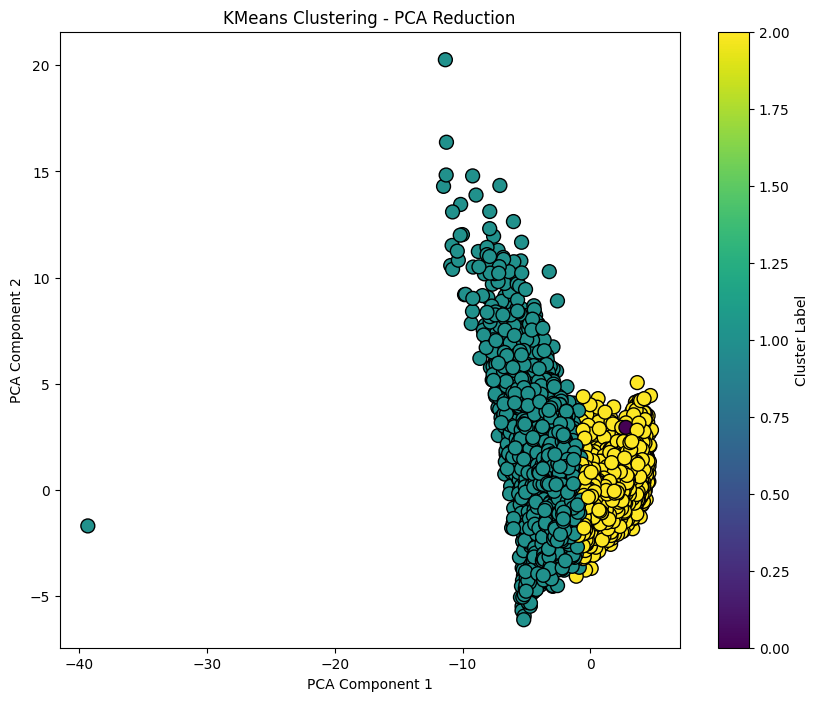

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
plt.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('KMeans Clustering - PCA Reduction')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [36]:
df_ready = pd.DataFrame({
    "Rating":y_resampled,
    'cluster': cluster_labels
})
df_ready

,Rating,cluster
0,3,2
1,1,1
2,3,2
3,3,2
4,3,2
...,...,...
38492,2,1
38493,2,1
38494,2,1
38495,2,1


In [37]:
# Check the distribution of ratings per cluster
cluster_rating_distribution = df_ready.groupby('cluster')['Rating'].value_counts()
print("\nCluster to Rating Distribution:")
print(cluster_rating_distribution)


Cluster to Rating Distribution:
cluster  Rating
0        3           197
1        1         11809
         3           852
         2           728
2        3         24620
         2           250
         1            41
Name: count, dtype: int64


In [38]:
# Create 'Predicted Rating' column based on majority class within each cluster
df_ready['Predicted Rating'] = df_ready.groupby('cluster')['Rating'].transform(lambda x: x.mode()[0])

# Step 8: Print the result of the cluster to rating mapping
cluster_rating_mapping = df_ready.groupby('cluster')['Rating'].agg(lambda x: x.mode()[0]).reset_index()
print("\nCluster to Rating Mapping:")
print(cluster_rating_mapping)


Cluster to Rating Mapping:
   cluster  Rating
0        0       3
1        1       1
2        2       3


In [39]:
match_percentage = (df_ready["Rating"] == df_ready["Predicted Rating"]).mean() * 100
print(f"\nExact Match Percentage: {match_percentage:.2f}%")


Exact Match Percentage: 95.14%


In [40]:
#using f1 score beacasue we have th elabel to know how good our clustering is
from sklearn.metrics import f1_score
f1_score(df_ready['Rating'], df_ready['Predicted Rating'],average='weighted')

0.939816292122065

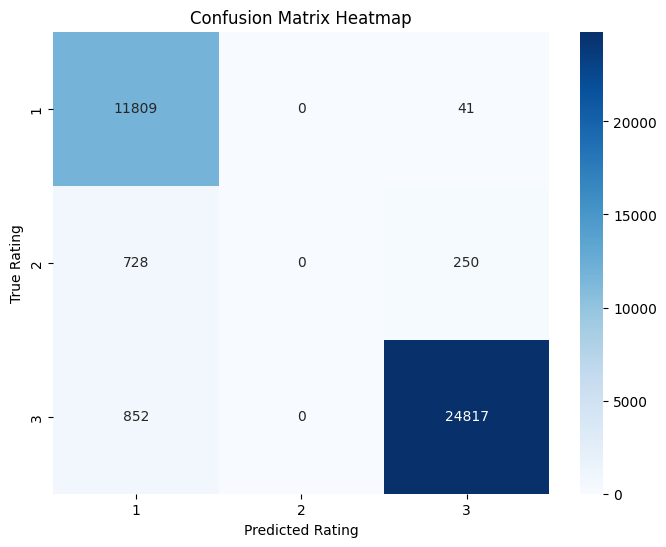

In [41]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(df_ready['Rating'], df_ready['Predicted Rating'])
labels = np.sort(df_ready['Rating'].unique())
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Rating')
plt.ylabel('True Rating')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Comp

In [42]:
X_normalizedt = scaler.transform(Xt)


In [43]:
y_predt = kmeans.predict(X_normalizedt)
cluster_to_rating = {
    0:3 ,
    1:1,
    2:3
}
# Map the predicted clusters to ratings using the mapping
y_predt = [cluster_to_rating[cluster] for cluster in y_predt]

In [44]:
df_comp = pd.DataFrame({
    "ID":df_test["ID"],
    "Rating":y_predt
})
df_comp

,ID,Rating
0,191058,3
1,136974,3
2,146157,3
3,106708,3
4,141727,3
...,...,...
11995,175308,3
11996,167206,3
11997,134169,1
11998,130286,3


In [45]:
df_comp.to_csv("Final_test.csv", index=False)

In [46]:
#colab
from google.colab import files
files.download("Final_test.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>